# Assignment 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

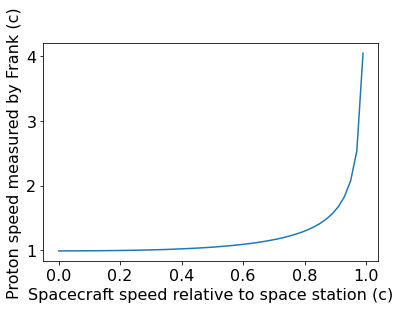

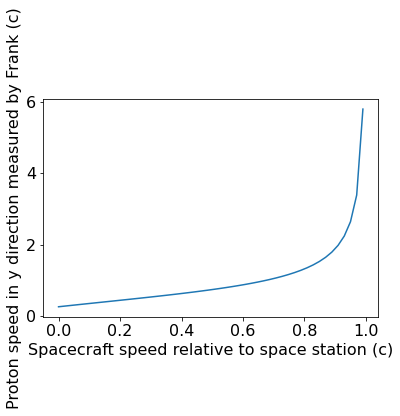

In [26]:
##Part A##

c = 3e8  
angle = np.radians(15)

def proton_velocity(vspaceship):
    norm_vel = c * 0.99 
    gamma = 1 / ((1 - vspaceship**2/c**2)**(1/2))
    observed_vx = (norm_vel + vspaceship*gamma) / (1 + norm_vel*vspaceship/(c**2))
    return observed_vx

v = np.linspace(0, 0.99*c, 50)

w = np.zeros_like(v)
for i in range(len(v)):
    w[i] = proton_velocity(v[i])

plt.plot(v/c, w/c)
plt.xlabel('Spacecraft speed relative to space station (c)')
plt.ylabel('Proton speed measured by Frank (c)')
plt.show()


##Part B##

def yproton_velocity(vspaceship, angle):
    norm_vel = c * 0.99 
    gamma = 1 / ((1 - vspaceship**2/c**2)**(1/2))
    norm_vely = norm_vel * np.sin(angle)
    observed_vy = (norm_vely + vspaceship*gamma) / (1 + norm_vely*vspaceship/(c**2))
    return observed_vy

w = np.zeros_like(v)
for i in range(len(v)):
    w[i] = yproton_velocity(v[i], angle)
    
plt.plot(v/c, w/c)
plt.xlabel('Spacecraft speed relative to space station (c)')
plt.ylabel('Proton speed in y direction measured by Frank (c)')
plt.show()




<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

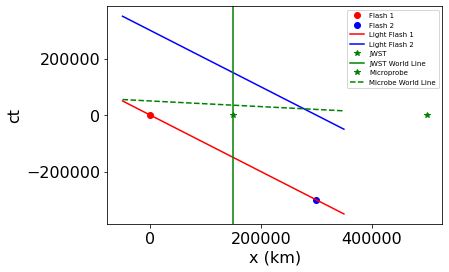

In [73]:


x1 = 0         
x2 = 300000   
t = 0           

def ct(x, t):
    return c * t - x
  
probe_speed = 0.1*c
probe_line = [(500000 + probe_speed*t, t)]


plt.plot(x1, ct(x1, t), 'ro', label='Flash 1')
plt.plot(x2, ct(x2, t), 'bo', label='Flash 2')

x = np.linspace(-50000, 350000, 100)
plt.plot(x, ct(x - x1, t), 'r-', label='Light Flash 1')
plt.plot(x, ct(x - x2, t), 'b-', label='Light Flash 2')

plt.plot(150000, ct(0,t), 'g*', label='JWST')
plt.axvline(x=150000, color='g', label='JWST World Line')

plt.plot(500000, ct(0,t), 'g*', label='Microprobe')
plt.plot(x, .1 * ct(x - 500000,t), 'g--', label='Microbe World Line')

plt.xlabel('x (km)')
plt.ylabel('ct')
plt.legend(fontsize = 7)

plt.show()